In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
from google.colab import files
df=files.upload()

Saving housing.csv to housing (4).csv


In [141]:
df=pd.read_csv("housing.csv")

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [143]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [145]:
df.dropna(inplace=True)

In [146]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [147]:
df=df.drop_duplicates()

In [148]:
df.shape

(20433, 10)

In [149]:
from sklearn.model_selection import train_test_split
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #splitting data to test and train

In [151]:
train_data=x_train.join(y_train) #joining features with label

In [152]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3488,-118.57,34.29,4.0,6995.0,1151.0,2907.0,1089.0,7.0808,<1H OCEAN,341200.0
2746,-115.57,32.78,29.0,2321.0,367.0,1173.0,360.0,4.0375,INLAND,86400.0
19025,-121.99,38.34,13.0,3252.0,610.0,1915.0,631.0,4.2137,INLAND,151700.0
364,-122.14,37.75,33.0,1334.0,200.0,579.0,202.0,6.8323,NEAR BAY,255900.0
19914,-119.29,36.31,34.0,1439.0,253.0,607.0,223.0,3.0972,INLAND,82800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

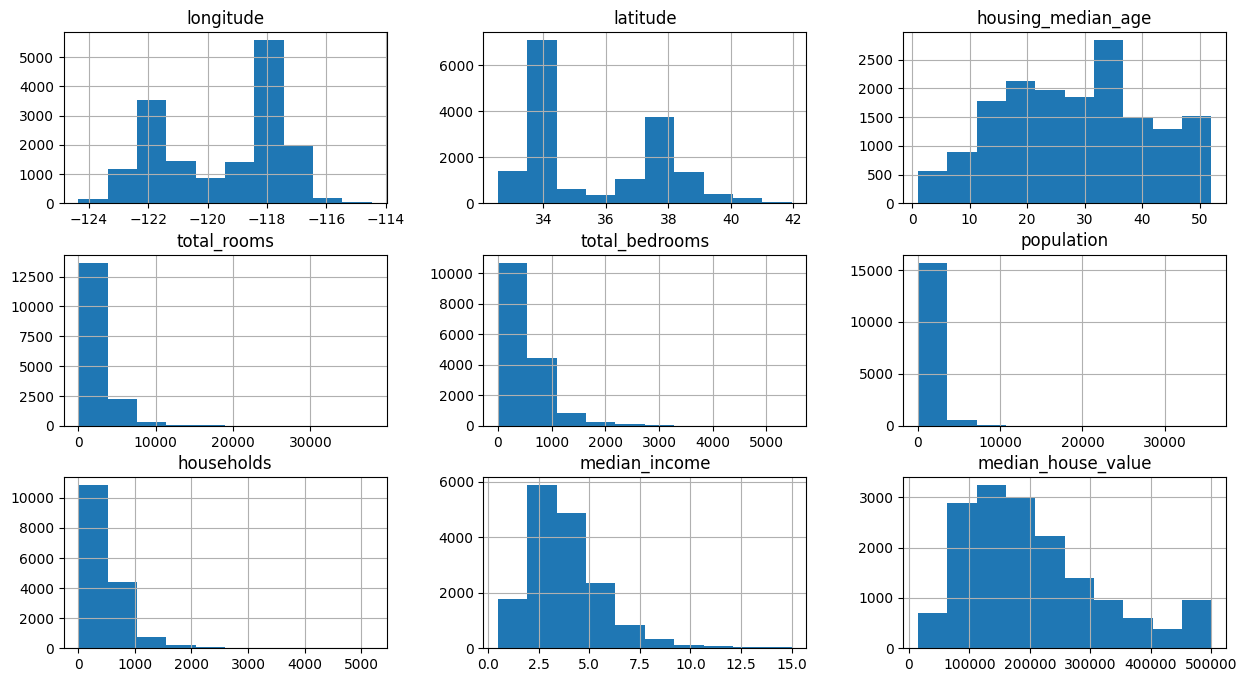

In [153]:
train_data.hist(figsize=(15,8))

<Axes: >

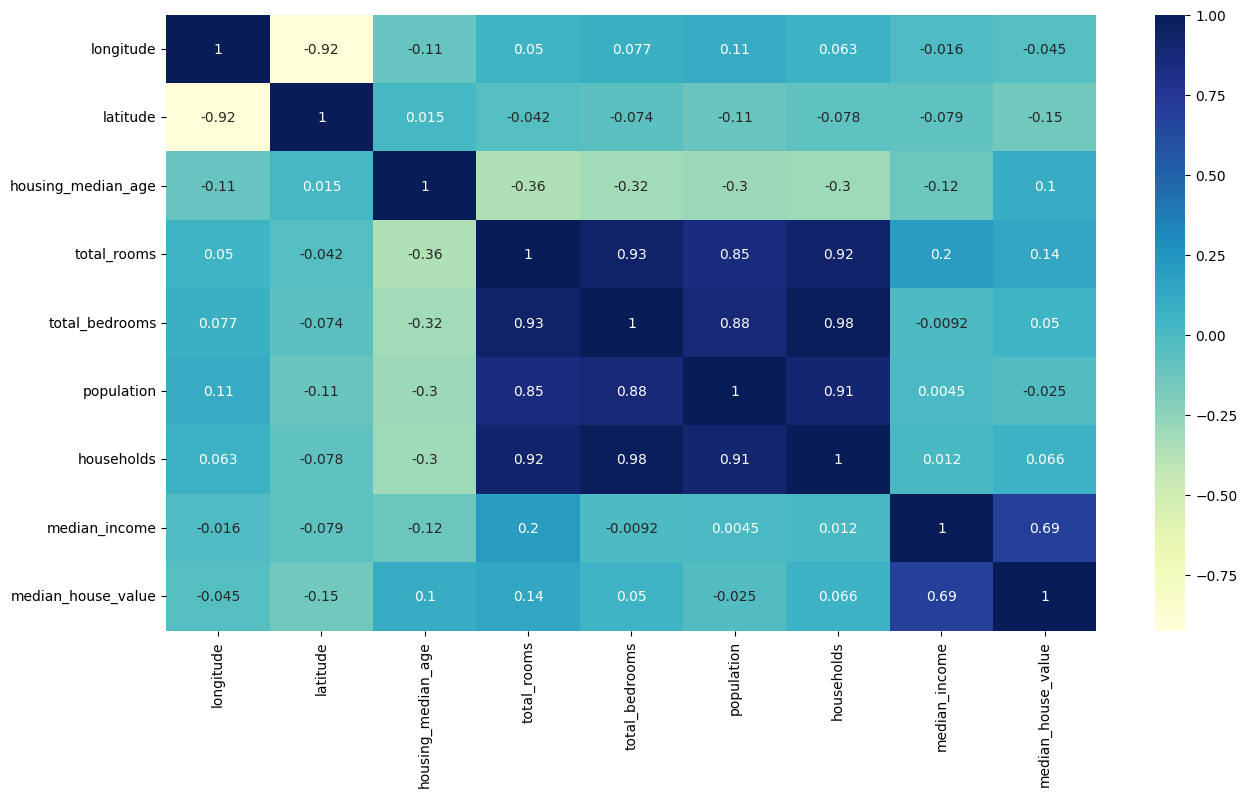

In [154]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop(columns=['ocean_proximity']).corr(),
            annot=True, cmap="YlGnBu")

In [155]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1) #log transformation
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

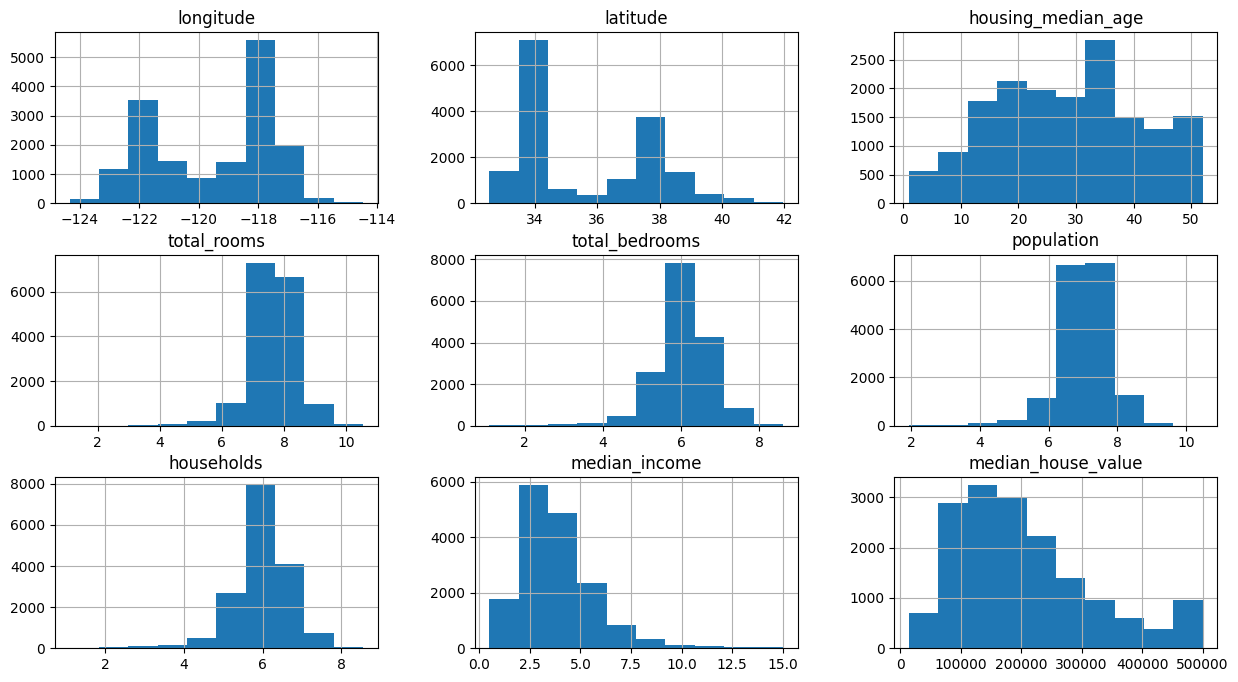

In [156]:
train_data.hist(figsize=(15,8))

In [157]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)


<Axes: >

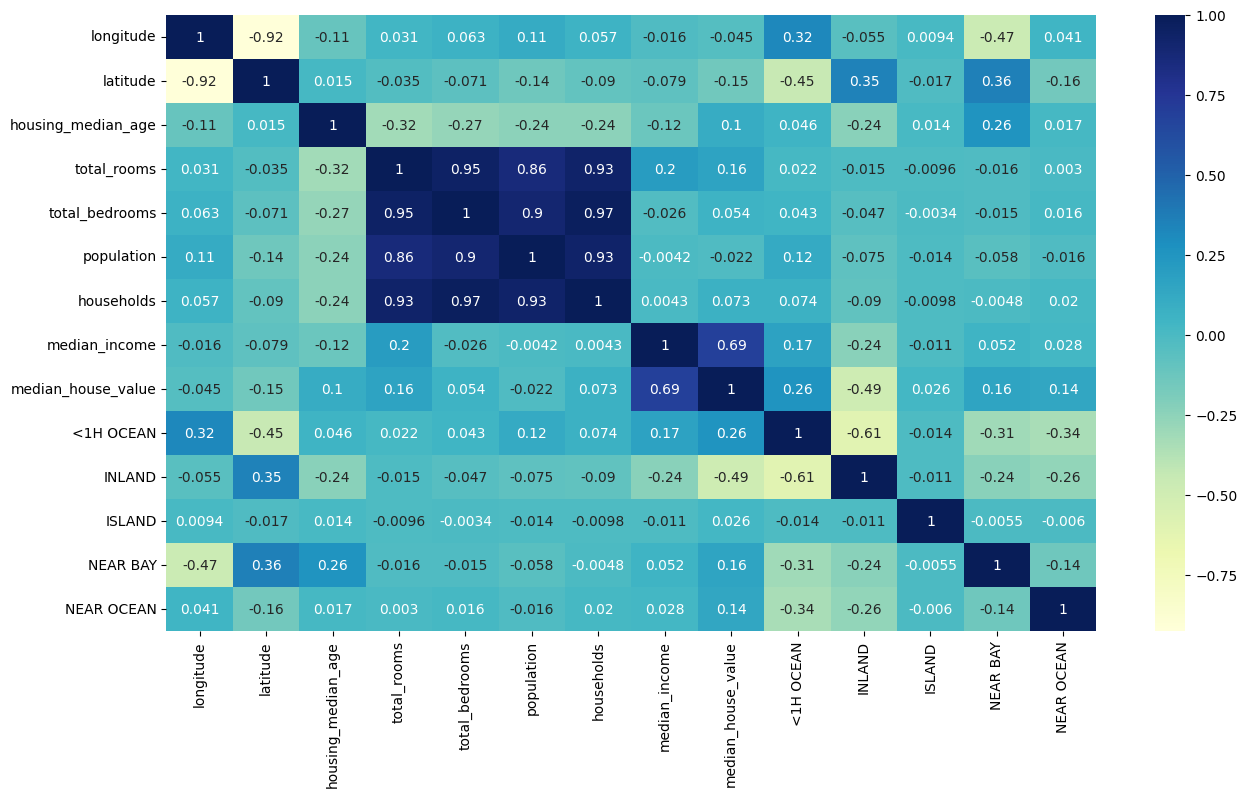

In [158]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),
            annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

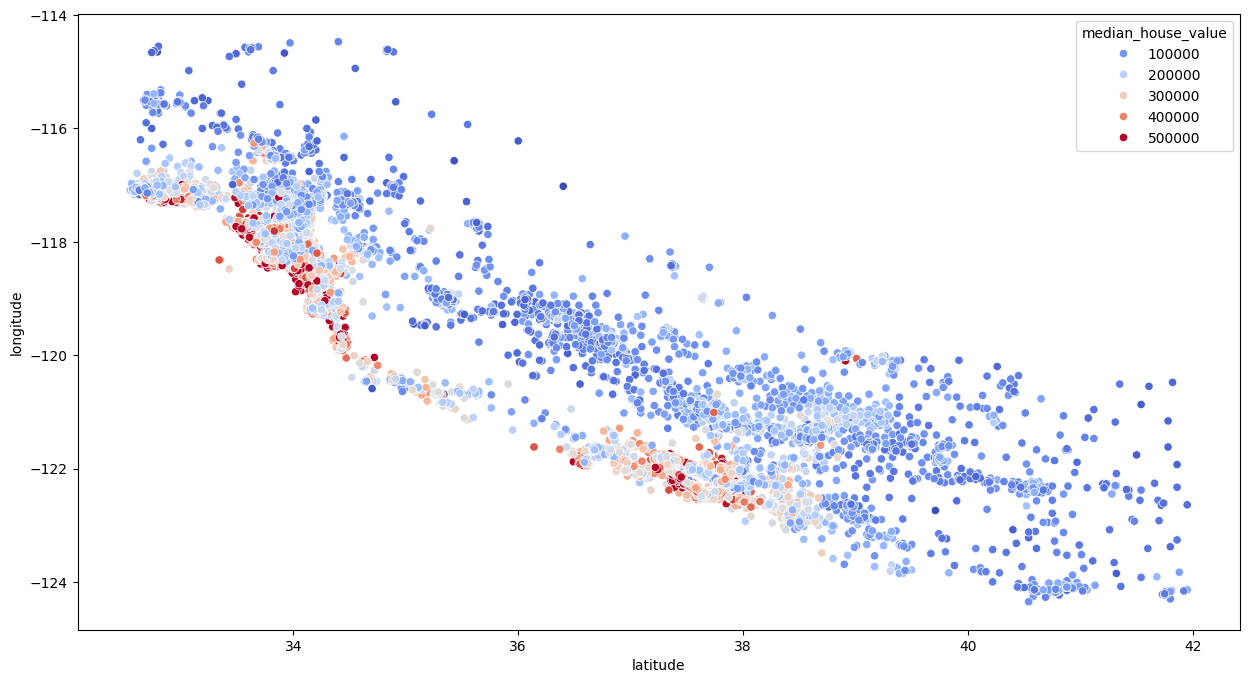

In [159]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [160]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_room']=train_data['total_bedrooms']/train_data['households']

<Axes: >

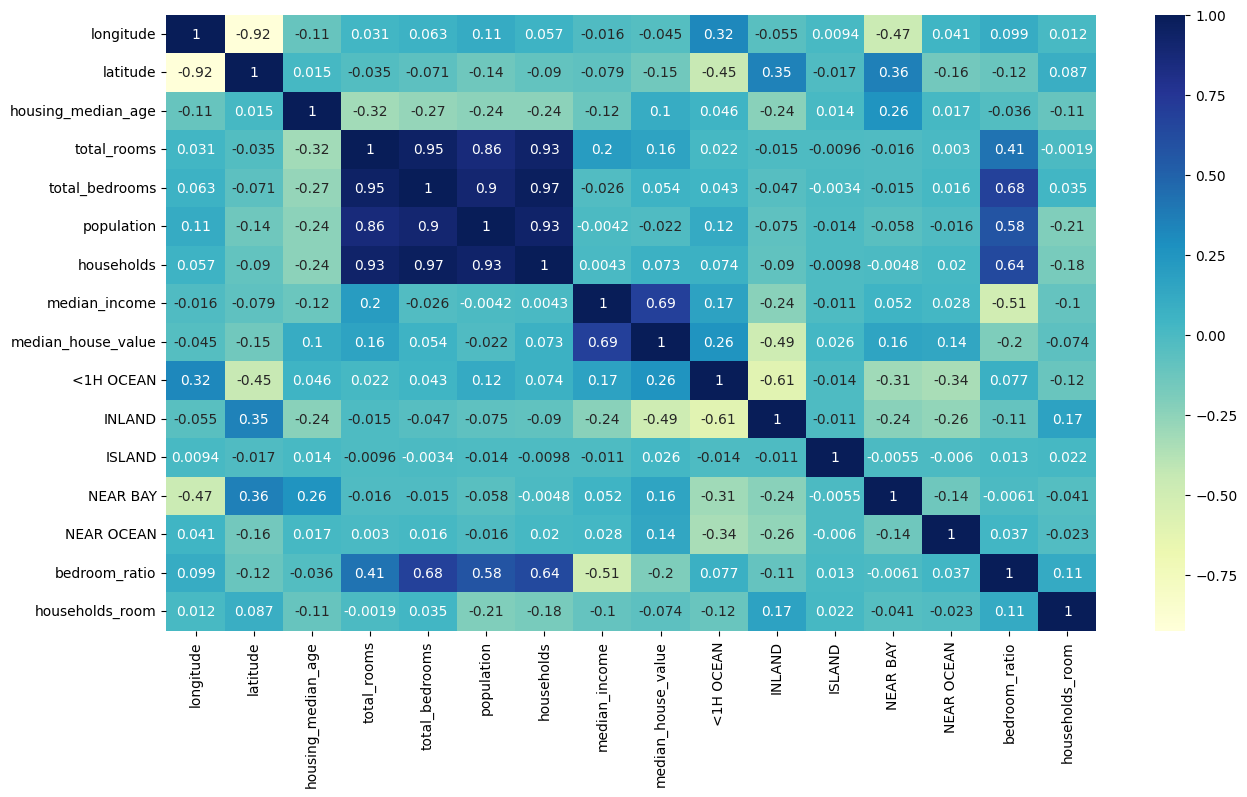

In [161]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),
            annot=True, cmap="YlGnBu")

In [173]:
from sklearn.linear_model import LinearRegression

y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)
X = pd.get_dummies(X, columns=['ocean_proximity'])


x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [187]:
y_pred = reg.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

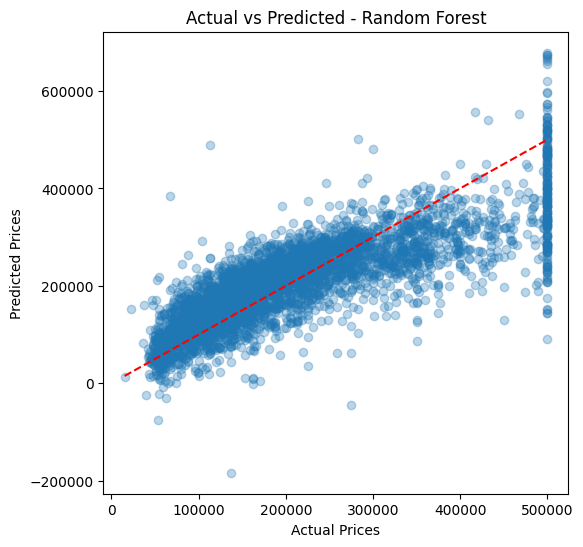

In [185]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted - Random Forest")
plt.show()

In [186]:
reg.score(x_test,y_test)

0.6488402154432009